MSc Data Science Thesis code. \
Predicting the probability of critical illness insurance claims as a form of noncommunicable disease management. \
This notebook compares the results of the analyses with and without client health claim information.

# Project Set up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.3}'.format)

# Comparison of Probability Estimation
In this section we compare the classifier perfomances with and without additional health claim information.\
First we load all the probability estimation results and filter the runs from the best classifier per test.\
This is the Random Forest for the tests excluding health claims, and the Logistic Regression with Elastic Net for the tests including health claims.

In [4]:
#Load the probability estimation results using coverage information only
cvg_only_results = pd.read_csv('RESULTS/classification_results_cvg_only.csv')
#Load the probability estimation results using coverage information and health claims
cvg_health_claims_results = pd.read_csv('RESULTS/classification_results_cvg_health_claims.csv')

In [5]:
#Load the best classifier results using coverage information only
cvg_only_best_clf = pd.read_csv('RESULTS/best_model_cvg_only.csv')
#Load the best classifier results using coverage information and health claims
cvg_health_claims_best_clf = pd.read_csv('RESULTS/best_model_cvg_health_claims.csv')

In [6]:
#Observe top classifier without health claims
cvg_only_best_clf.clf.describe()

count      8
unique     1
top       rf
freq       8
Name: clf, dtype: object

In [7]:
#Observe top classifier with health claims
cvg_health_claims_best_clf.clf.describe()

count        8
unique       1
top       lren
freq         8
Name: clf, dtype: object

In [8]:
#Filter the datasets for the most perfomant models only
cvg_only_results = cvg_only_results.query("clf == 'rf'")
cvg_health_claims_results = cvg_health_claims_results.query("clf == 'lren'")
#Attach an identifier for the experiment
cvg_only_results.loc[:, 'dataset'] = 'CVG ONLY'
cvg_health_claims_results.loc[:, 'dataset'] = 'CVG+HEALTH'
#Combine the results
all_clf_results = pd.concat([cvg_only_results, cvg_health_claims_results])
all_clf_results.shape

(200, 7)

In [9]:
all_clf_results.head()

,clf,year,interval,log_loss,log_skill_score,roc_auc,dataset
120,rf,2023,0,0.105,0.0984,0.791,CVG ONLY
121,rf,2023,0,0.105,0.0987,0.791,CVG ONLY
122,rf,2023,0,0.105,0.0977,0.791,CVG ONLY
123,rf,2023,0,0.105,0.0972,0.788,CVG ONLY
124,rf,2023,0,0.106,0.0846,0.773,CVG ONLY


## 2023 Test
Plot the range of log loss skill scores and roc auc returned from the best classifier across experiments with and without health claims.

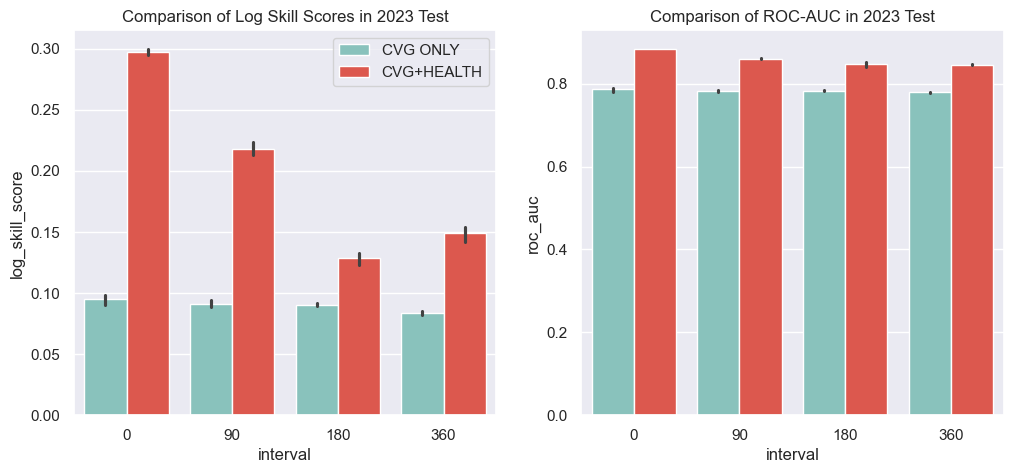

In [10]:
#Plot the comparison of best classifier performance with and without health claims
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
query = all_clf_results.query('year==2023')
palette=['#80cbc4','#f44336']

#Log skill score plot
sns.barplot(data=query, y='log_skill_score', x='interval', hue='dataset', ax=ax1, orient='v', palette=palette)
ax1.set_title('Comparison of Log Skill Scores in 2023 Test')
ax1.title.set_size(12)
ax1.legend(loc='upper right')
#ROC AUC plot
sns.barplot(data=query, y='roc_auc', x='interval', hue='dataset', ax=ax2, orient='v', palette=palette)
ax2.set_title('Comparison of ROC-AUC in 2023 Test')
ax2.title.set_size(12)
ax2.get_legend().remove()

plt.show()

## 2024 Test
Plot the range of log loss skill scores and roc auc returned from the best classifier across experiments with and without health claims.

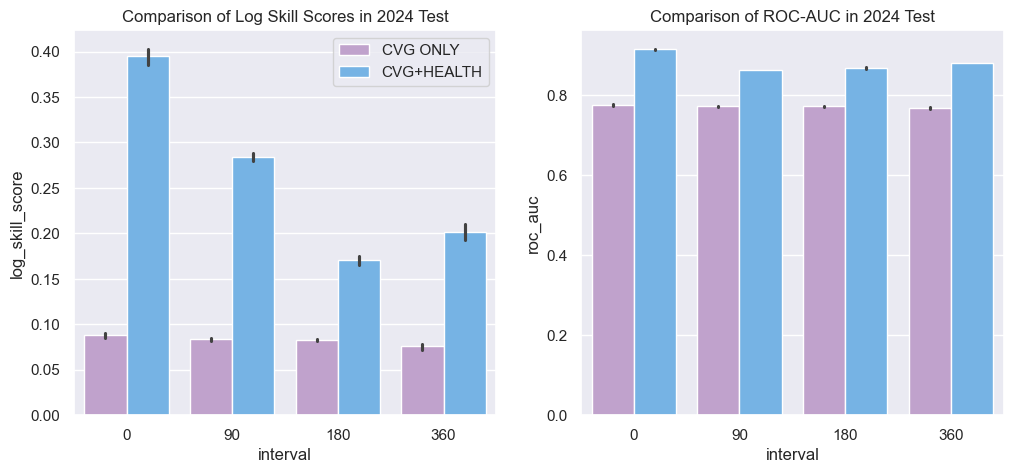

In [11]:
#Plot the comparison of best classifier performance with and without health claims
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
query = all_clf_results.query('year==2024')
palette=['#c39bd3','#64b5f6']

#Log skill score plot
sns.barplot(data=query, y='log_skill_score', x='interval', hue='dataset', ax=ax1, orient='v', palette=palette)
ax1.set_title('Comparison of Log Skill Scores in 2024 Test')
ax1.title.set_size(12)
ax1.legend(loc='upper right')
#ROC AUC plot
sns.barplot(data=query, y='roc_auc', x='interval', hue='dataset', ax=ax2, orient='v', palette=palette)
ax2.set_title('Comparison of ROC-AUC in 2024 Test')
ax2.title.set_size(12)
ax2.get_legend().remove()

plt.show()

# Comparison of Ranking Analyses
In this section we compare the ranking results with and without additional health claim information.\
These experiments would have been based on the best classifier producing probability estimates. \
This is the Random Forest for the tests excluding health claims, and the Logistic Regression with Elastic Net for the tests including health claims.

In [12]:
#Load the probability estimation results using coverage information only
cvg_only_ranking = pd.read_csv('RESULTS/ranking_results_cvg_only.csv')
#Load the probability estimation results using coverage information and health claims
cvg_health_claims_ranking = pd.read_csv('RESULTS/ranking_results_cvg_health_claims.csv')

In [13]:
#Attach an identifier for the experiment
cvg_only_ranking.loc[:, 'dataset'] = 'CVG ONLY'
cvg_health_claims_ranking.loc[:, 'dataset'] = 'CVG+HEALTH'
#Combine the results
all_ranking_results = pd.concat([cvg_only_ranking, cvg_health_claims_ranking])
all_ranking_results.shape

(600, 7)

In [14]:
all_ranking_results.head()

,year,interval,id,k,precision_at_k,recall_at_k,dataset
0,2023,0,Top10,10,0.3,0.00952,CVG ONLY
1,2023,0,Top20,20,0.2,0.0127,CVG ONLY
2,2023,0,Claim Rate,237,0.101,0.0762,CVG ONLY
3,2023,0,Top10,10,0.2,0.00635,CVG ONLY
4,2023,0,Top20,20,0.2,0.0127,CVG ONLY


## 2023 Test
Plot the range of Precision-at-K and Recall-at-K scores returned from the best classifier across experiments with and without health claims.

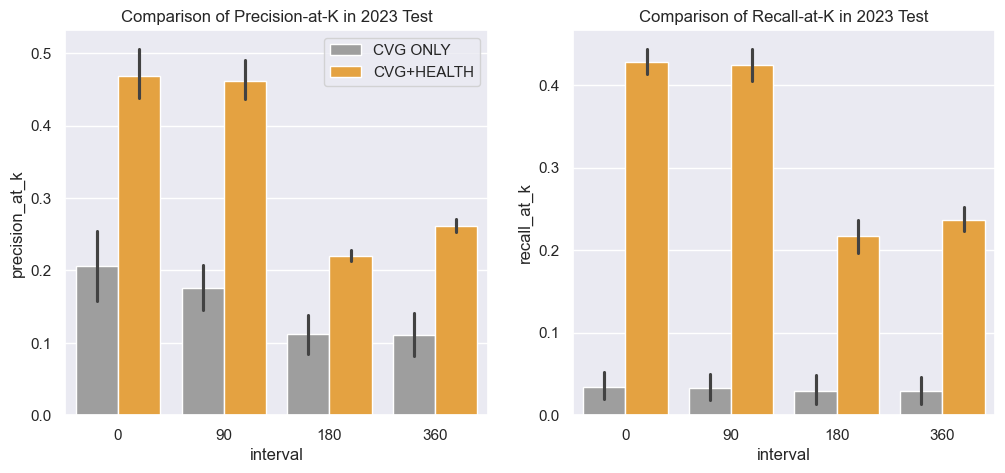

In [15]:
#Plot the comparison of best classifier performance with and without health claims
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
query = all_ranking_results.query('year==2023')
palette=['#9e9e9e','#ffa726']

#Log skill score plot
sns.barplot(data=query, y='precision_at_k', x='interval', hue='dataset', ax=ax1, orient='v', palette=palette)
ax1.set_title('Comparison of Precision-at-K in 2023 Test')
ax1.title.set_size(12)
ax1.legend(loc='upper right')
#ROC AUC plot
sns.barplot(data=query, y='recall_at_k', x='interval', hue='dataset', ax=ax2, orient='v', palette=palette)
ax2.set_title('Comparison of Recall-at-K in 2023 Test')
ax2.title.set_size(12)
ax2.get_legend().remove()

plt.show()

## 2024 Test
Plot the range of Precision-at-K and Recall-at-K scores returned from the best classifier across experiments with and without health claims.

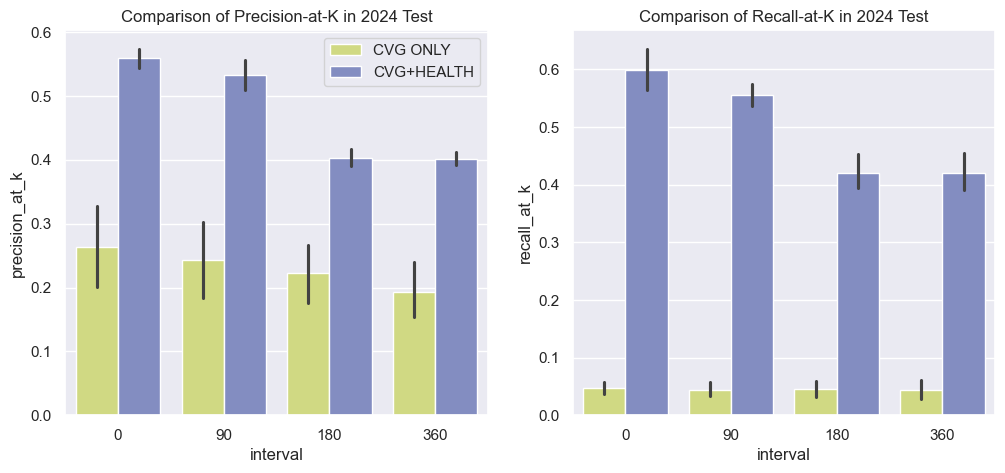

In [16]:
#Plot the comparison of best classifier performance with and without health claims
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
query = all_ranking_results.query('year==2024')
palette=['#dce775','#7986cb']

#Log skill score plot
sns.barplot(data=query, y='precision_at_k', x='interval', hue='dataset', ax=ax1, orient='v', palette=palette)
ax1.set_title('Comparison of Precision-at-K in 2024 Test')
ax1.title.set_size(12)
ax1.legend(loc='upper right')
#ROC AUC plot
sns.barplot(data=query, y='recall_at_k', x='interval', hue='dataset', ax=ax2, orient='v', palette=palette)
ax2.set_title('Comparison of Recall-at-K in 2024 Test')
ax2.title.set_size(12)
ax2.get_legend().remove()

plt.show()